In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mobile-phone-pricing-dataset/Mobile Phone Pricing.csv


# What problem do I want to solve?
- I want to create a model that predicts the price range of a phone.
- I also want to know which features deserve the most attention, so I can sell it at the right price.
- I want to know for sure what price range to sell my phone in, based on its specifications.
- I want to know how the features affect the predictions.

## Who's interested?
Phone sellers: 
- Samsung
- iPhone
- Xiaomi
- Realme
- etc

In [2]:
# Libries
import matplotlib.pyplot as plt
import seaborn as sns

### Reviewing the firsts rows of the dataset

In [3]:
df = pd.read_csv('/kaggle/input/mobile-phone-pricing-dataset/Mobile Phone Pricing.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


### Reviewing the statics of the columns

In [4]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### Nulls and data types

We don't have any null, and any categorical data type, only numeric

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
X = df.drop('price_range', axis=1)
y = df.price_range

# Mutual information

Calculate the mutual information score to see which variables are the most important

In [7]:
from sklearn.feature_selection import mutual_info_regression
discrete_features = X.dtypes == int
mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
mi_scores = pd.Series(mi_scores, name='Mi Scores', index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)
mi_scores = pd.DataFrame(mi_scores)
mi_scores

,Mi Scores
ram,2.307106
battery_power,0.664192
px_height,0.433805
px_width,0.429099
sc_h,0.030770
touch_screen,0.020014
clock_speed,0.017625
four_g,0.013900
blue,0.012140
wifi,0.011112


<Axes: xlabel='Mi Scores'>

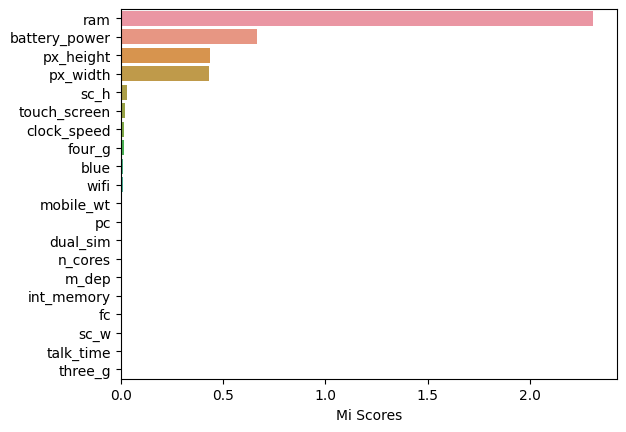

In [8]:
sns.barplot(x=mi_scores['Mi Scores'], y=mi_scores.index)

# Correlations
**We can see that the variables with the greatest correlation are:**
- four_g with three_g. They indicate whether it has 3G or 4G.
- pc with fc. Both refer to the camera's megapixels.
- px_height with px_width. Both refer to the screen's pixels.
- ram with price_range. RAM is the most important feature in determining the price.

<Axes: >

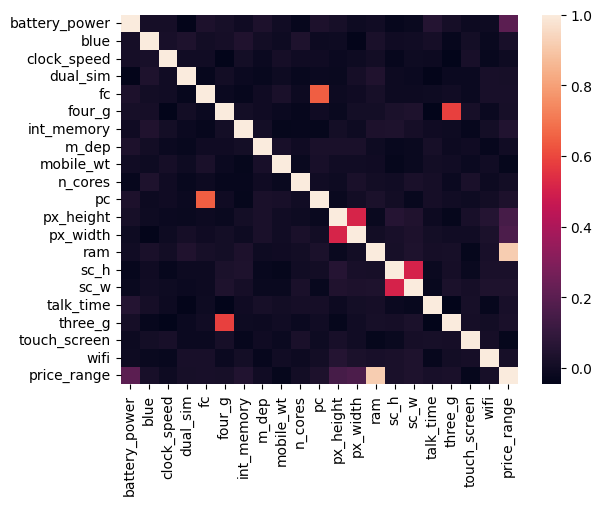

In [9]:
correlations = df.corr()
sns.heatmap(data=correlations)

In [10]:
# Model without feature engineering
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest_model = RandomForestClassifier(random_state=1)

scores = cross_val_score(forest_model, X, y, cv=5, scoring='accuracy')
print(f'Accuracy folds errors: {scores}      Mean accuracy errors: {scores.mean()}')

Accuracy folds errors: [0.87   0.8925 0.8975 0.87   0.8725]      Mean accuracy errors: 0.8805


In [11]:
# Best n_estimators: 325

for i in [300, 325, 350, 375,400]:
    forest_model = RandomForestClassifier(random_state=1, n_estimators=i)
    scores = cross_val_score(forest_model, X, y, cv=5, scoring='accuracy')
    print(f'Accuracy folds errors: {scores}      Mean accuracy errors: {scores.mean()}')

Accuracy folds errors: [0.8775 0.8925 0.9125 0.8725 0.8675]      Mean accuracy errors: 0.8845000000000001
Accuracy folds errors: [0.8825 0.8925 0.9075 0.8725 0.875 ]      Mean accuracy errors: 0.8859999999999999
Accuracy folds errors: [0.8775 0.8875 0.91   0.8675 0.875 ]      Mean accuracy errors: 0.8835000000000001
Accuracy folds errors: [0.88   0.89   0.9075 0.8675 0.875 ]      Mean accuracy errors: 0.884
Accuracy folds errors: [0.8825 0.895  0.905  0.87   0.875 ]      Mean accuracy errors: 0.8855000000000001


# Feature Engineering

In [12]:
from sklearn.model_selection import train_test_split 

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1, train_size=0.8, test_size=0.2) 
forest_model = RandomForestClassifier(random_state=1, n_estimators=325)
forest_model.fit(train_X, train_y)
val_predictions = forest_model.predict(val_X)

## Permutation importance
Permutating the columns to see wich features are the most important

In [13]:
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(forest_model, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = X.columns.tolist())

2025-07-23 18:42:17.053749: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753296137.308926      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753296137.381073      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Weight,Feature
0.6015 ± 0.0103,ram
0.1320 ± 0.0246,battery_power
0.0680 ± 0.0331,px_height
0.0590 ± 0.0112,px_width
0.0060 ± 0.0040,sc_w
0.0060 ± 0.0129,mobile_wt
0.0055 ± 0.0037,blue
0.0040 ± 0.0068,sc_h
0.0030 ± 0.0020,pc
0.0030 ± 0.0037,int_memory


In [14]:
X['resolution'] = X['px_width'] * X['px_height'] # Making a feature for resolution

In [15]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1, train_size=0.8, test_size=0.2) 
forest_model = RandomForestClassifier(random_state=1, n_estimators=325)
forest_model.fit(train_X, train_y)
val_predictions = forest_model.predict(val_X)

### Permutation importance 2
Creating a resoluton variable helps the model to make better predictions

In [16]:
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(forest_model, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = X.columns.tolist())

Weight,Feature
0.5925 ± 0.0387,ram
0.1230 ± 0.0166,battery_power
0.0445 ± 0.0229,resolution
0.0280 ± 0.0128,px_width
0.0125 ± 0.0187,px_height
0.0035 ± 0.0051,dual_sim
0.0020 ± 0.0086,pc
-0.0005 ± 0.0058,sc_h
-0.0005 ± 0.0020,three_g
-0.0015 ± 0.0051,sc_w


In [17]:
scores = cross_val_score(forest_model, X, y, cv=5, scoring='accuracy')
print(f'Accuracy folds errors: {scores}      Mean accuracy errors: {scores.mean()}')

Accuracy folds errors: [0.885  0.8825 0.9075 0.8925 0.8775]      Mean accuracy errors: 0.889


# Partial Dependance Plots

Partial Dependance Plots help us to see the relationships between a variable and the predictions

- A more ram a phone have, is more probable to fit in the very high price category

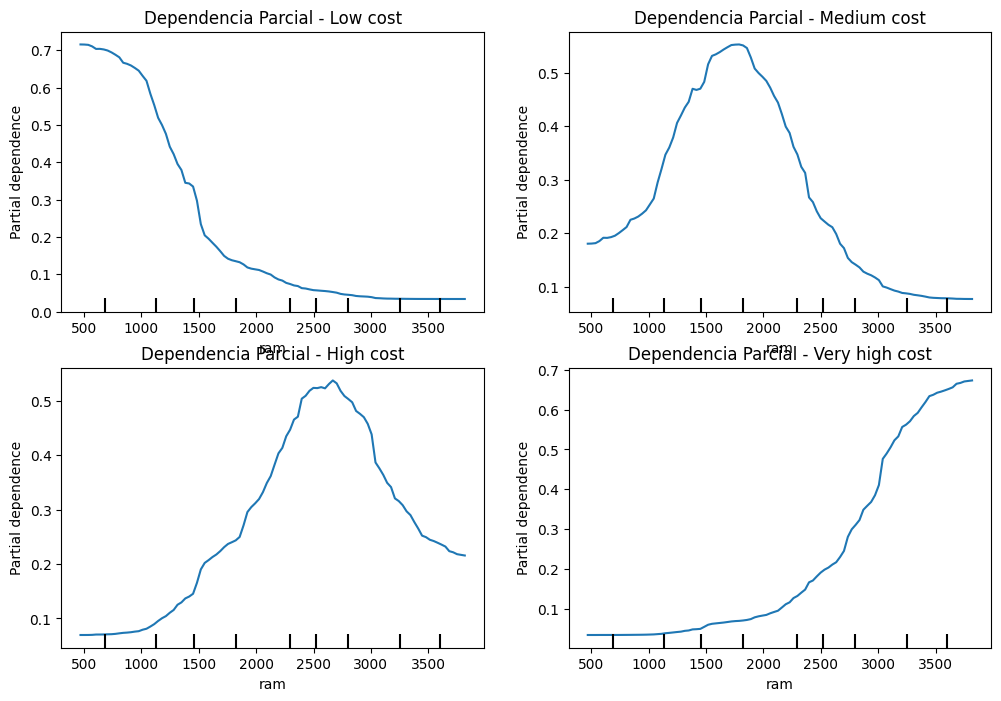

In [18]:
from sklearn.inspection import PartialDependenceDisplay
class_names = {
    0:'Low cost',
    1:'Medium cost',
    2:'High cost',
    3:'Very high cost'
}

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()

for i, target_class in enumerate(class_names.keys()):
    PartialDependenceDisplay.from_estimator(
        forest_model, val_X, ['ram'], target=target_class, ax=axs[i]
    )
    axs[i].set_title(f"Dependencia Parcial - {class_names[target_class]}")


How battery_power affect the predictions for each category?

- We can see that the more battery a phone have, is more probable that fit in the very high cost category
- And the less battery a phone have, is more probable that fit in the low cost category

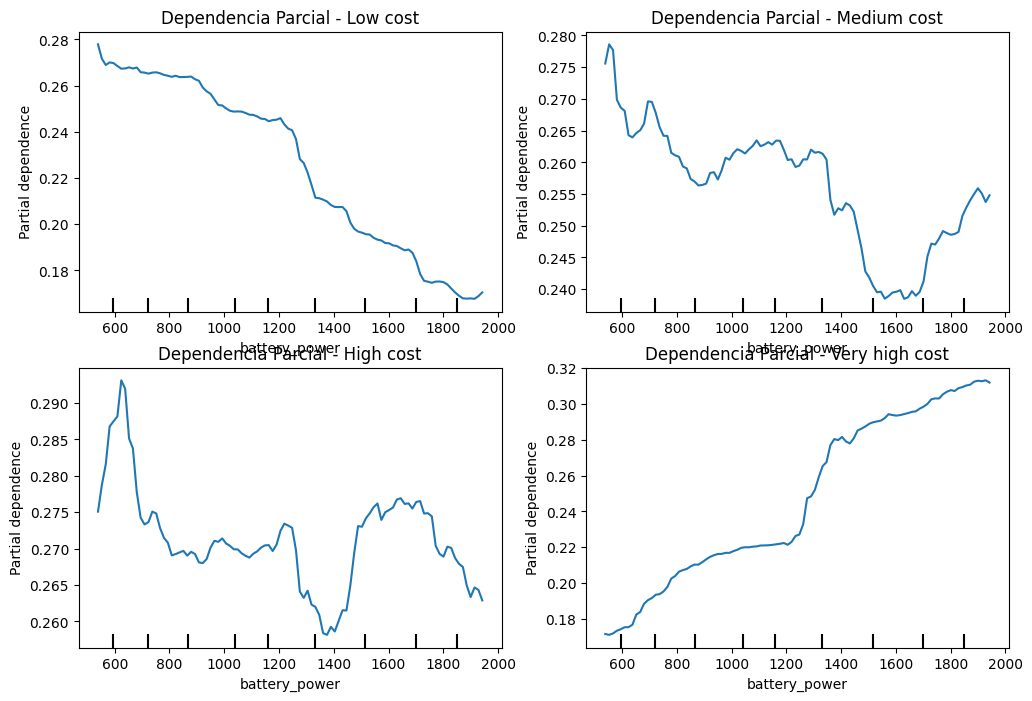

In [19]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()

for i, target_class in enumerate(class_names.keys()):
    PartialDependenceDisplay.from_estimator(
        forest_model, val_X, ['battery_power'], target=target_class, ax=axs[i]
    )
    axs[i].set_title(f"Dependencia Parcial - {class_names[target_class]}")

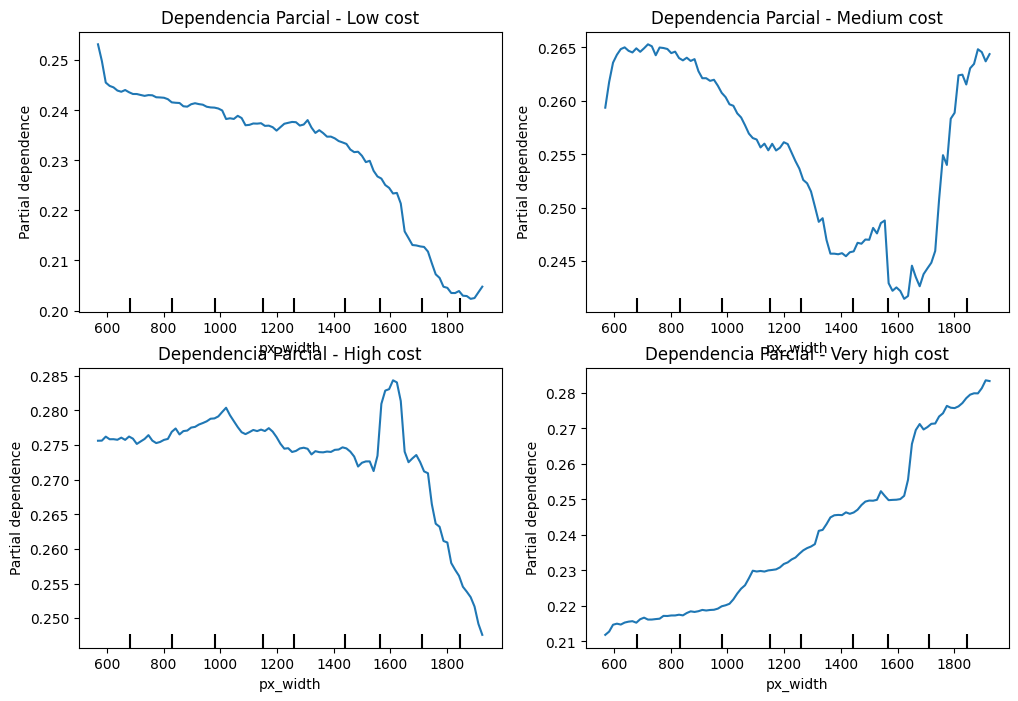

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()

for i, target_class in enumerate(class_names.keys()):
    PartialDependenceDisplay.from_estimator(
        forest_model, val_X, ['px_width'], target=target_class, ax=axs[i]
    )
    axs[i].set_title(f"Dependencia Parcial - {class_names[target_class]}")

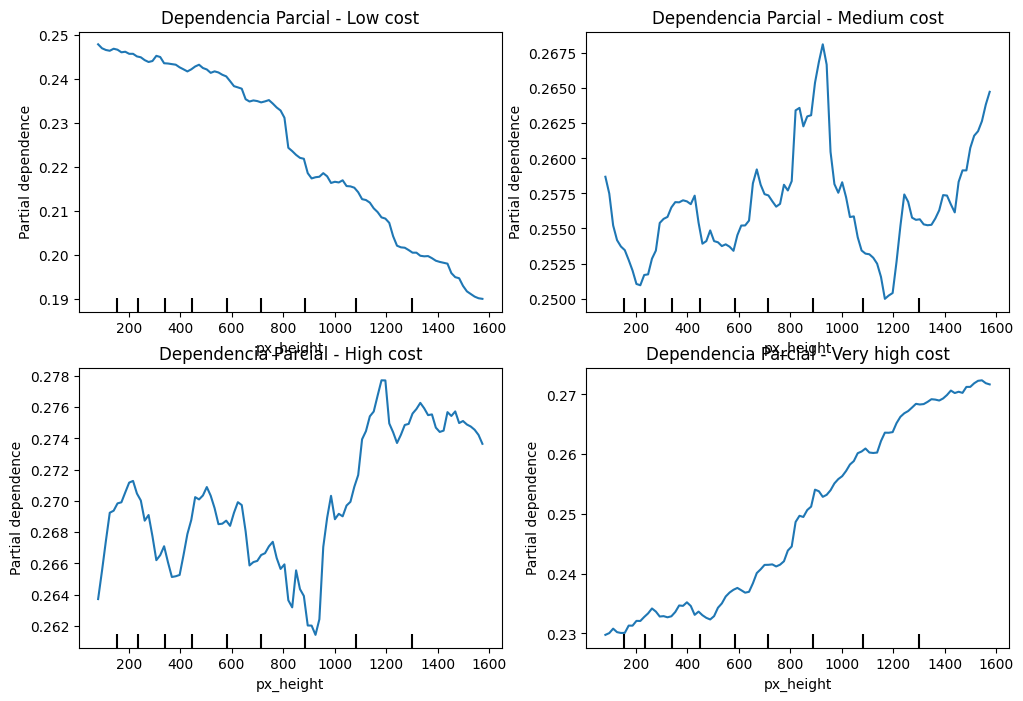

In [21]:

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()

for i, target_class in enumerate(class_names.keys()):
    PartialDependenceDisplay.from_estimator(
        forest_model, val_X, ['px_height'], target=target_class, ax=axs[i]
    )
    axs[i].set_title(f"Dependencia Parcial - {class_names[target_class]}")

# SHAP Values 

Shap Values give us a eagle eye view of all variables

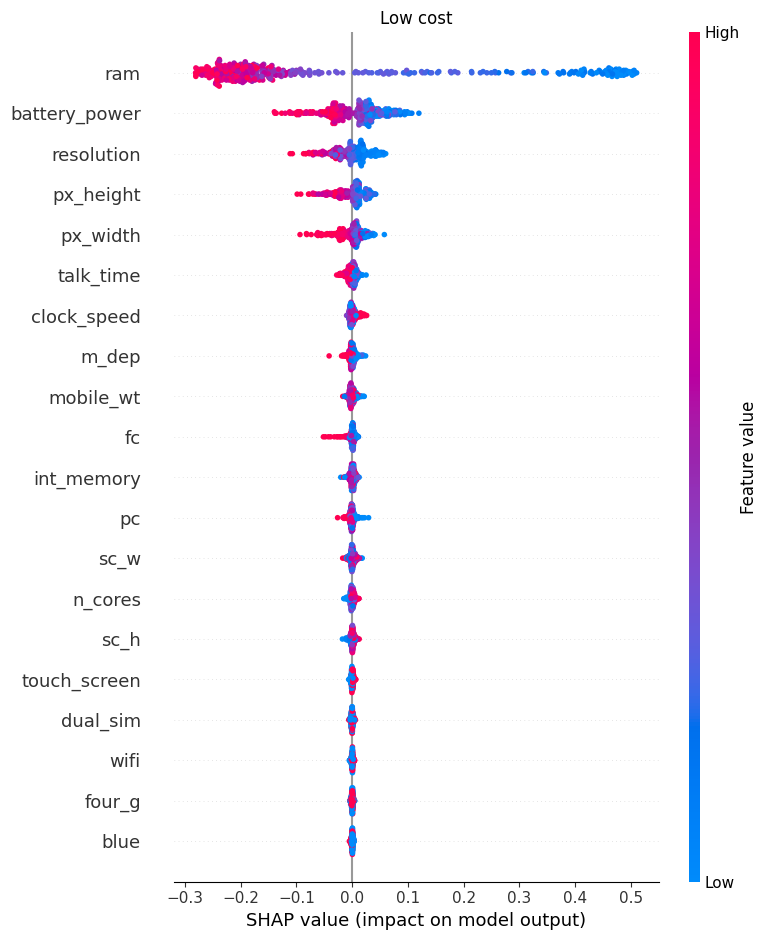

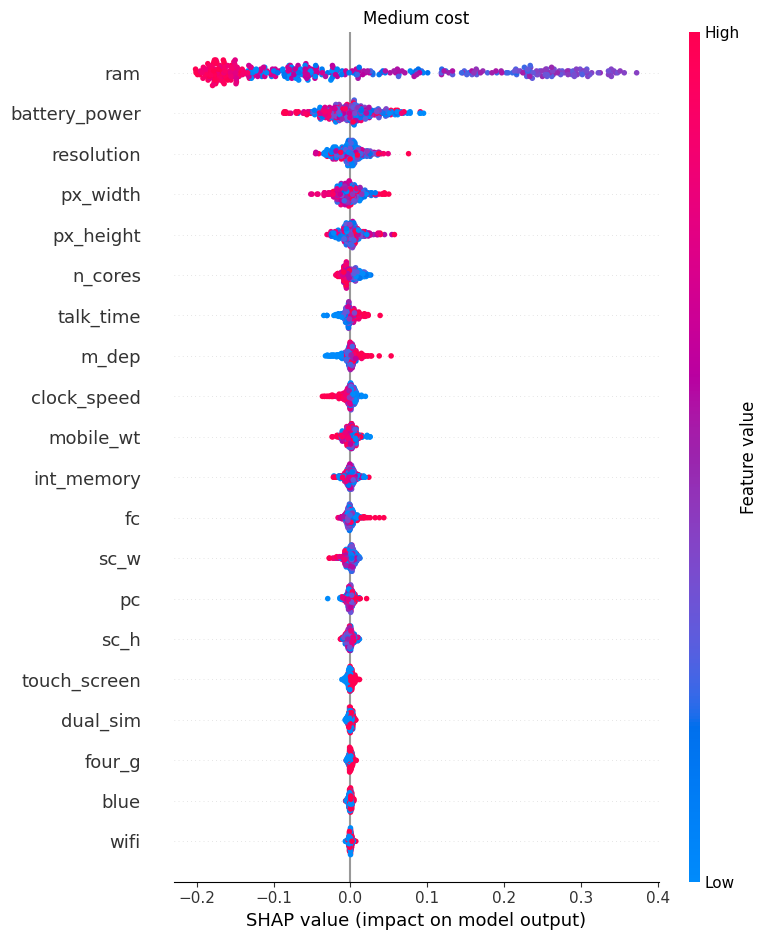

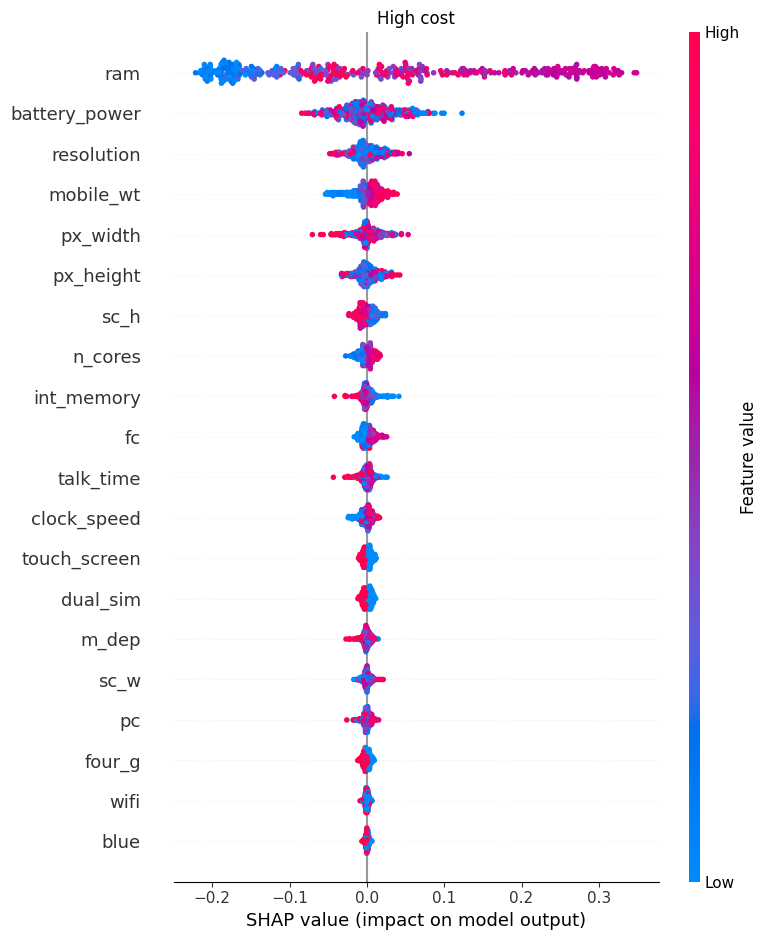

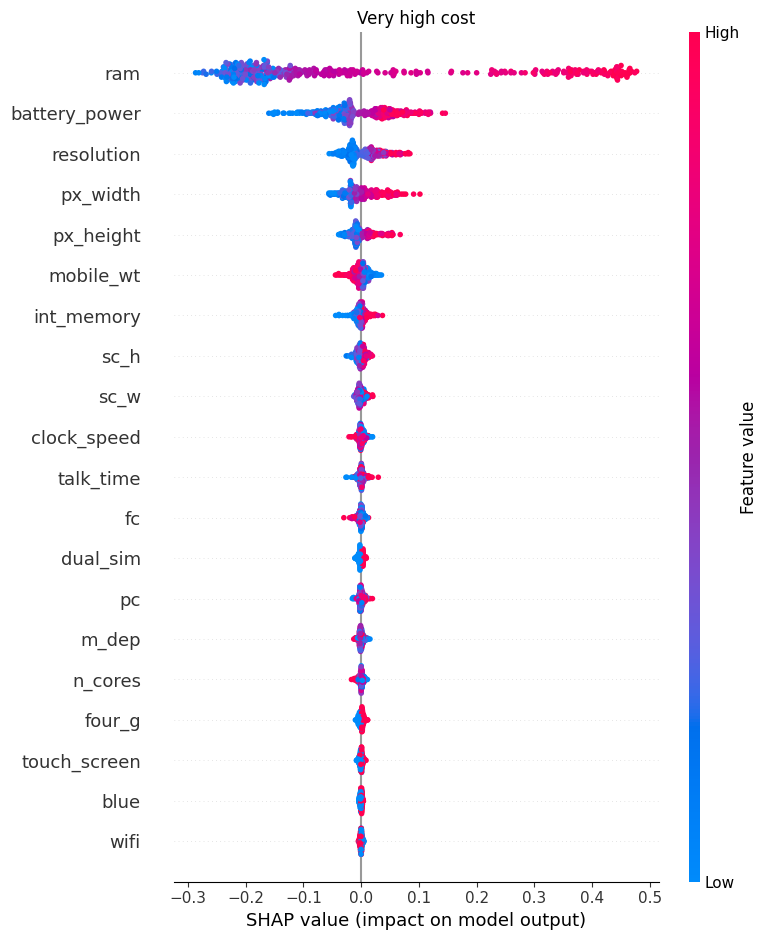

In [22]:
import shap
explainer = shap.TreeExplainer(forest_model)
shap_values = explainer.shap_values(val_X)
class_names = ['Low cost', 'Medium cost', 'High cost', 'Very high cost']

for i in range(len(shap_values)):
    plt.title(class_names[i])
    shap.summary_plot(shap_values[i], val_X, show=True)